In [1]:
import pandas as pd
ours = pd.read_csv('runs_H=10_online_model/aggregates/stats_train_reward.csv')
ours = ours[['steps', 'values']].set_index('steps').rename(columns={'values': 'reward'})

base = pd.read_csv('runs_baseline/aggregates/stats_train_reward.csv')
base = base[['steps', 'values']].set_index('steps').rename(columns={'values': 'reward'})

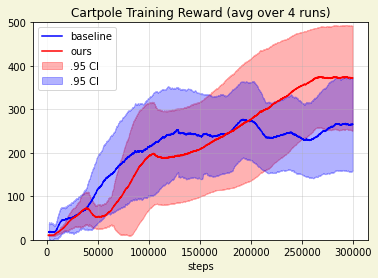

In [2]:
import matplotlib.pyplot as plt
avg_over = 500

fig=plt.figure(facecolor='beige')
ax = plt.subplot()
base.rolling(avg_over).mean().plot(ax=ax, color='blue')
ours.rolling(avg_over).mean().plot(ax=ax, color='red')

error = (ours.reward.rolling(avg_over).std()).values
means = (ours.reward.rolling(avg_over).mean()).values
plt.fill_between(ours.rolling(avg_over).mean().index, means-error, means+error, color='red', alpha=.3)

error = (base.reward.rolling(avg_over).std()).values
means = (base.reward.rolling(avg_over).mean()).values
plt.fill_between(base.rolling(avg_over).mean().index, means-error, means+error, color='blue', alpha=.3)

plt.ylim(0, 500)
plt.grid(alpha=.4, which='major')
plt.title('Cartpole Training Reward (avg over 4 runs)')
plt.legend(['baseline', 'ours', '.95 CI', '.95 CI'])

(-200.0, -50.0)

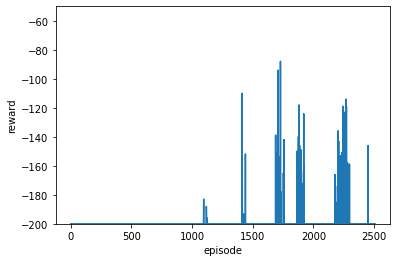

In [3]:
base = pd.read_csv('runs_lunar_base/aggregates/stats_train_reward.csv')
base = base.set_index('episode').rename(columns={'value': 'reward'}).sort_index()
base.reward.plot(ylabel='reward')
plt.ylim(-200, -50)

(-200.0, -50.0)

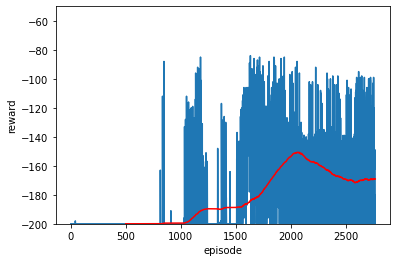

In [5]:
ours = pd.read_csv('runs_lunar_H=11/aggregates/stats_train_reward.csv')
ours = ours.set_index('episode').rename(columns={'value': 'reward'}).sort_index()
ax = plt.subplot()
ours.reward.plot(ylabel='reward', ax=ax)
ours.reward.rolling(avg_over).mean().plot(ax=ax, color='red')
plt.ylim(-200, -50)